In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# ------------------ Configuration ------------------

# Load CSVs
predictions_baseline = pd.read_csv("Results/model_predictions.csv (5-window).csv")
predictions_chronos = pd.read_csv("Results/chronos(5-day).csv")
predictions_timesfm = pd.read_csv("Results/timesfm(5-day).csv")
predictions_uni2ts = pd.read_csv("Results/uni2ts(5-day)predictions.csv")

# Convert 'DlyCalDt' to datetime
for df in [predictions_baseline, predictions_chronos, predictions_timesfm, predictions_uni2ts]:
    df['DlyCalDt'] = pd.to_datetime(df['DlyCalDt'])

# Sort by date
for df in [predictions_baseline, predictions_chronos, predictions_timesfm, predictions_uni2ts]:
    df.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)


top_n = 10  # Top N stocks to go long
bottom_n = 10 # Bottom N stocks to go short

# Combine all predictions into a single DataFrame
exclude_columns = ['DlyCalDt', 'PERMNO', 'ExcessReturn']

baseline_cols = predictions_baseline.columns.tolist()
chronos_cols = [cols for cols in predictions_chronos.columns.tolist() if cols not in exclude_columns]
timesfm_cols = [cols for cols in predictions_timesfm.columns.tolist() if cols not in exclude_columns]
uni2ts_cols = [cols for cols in predictions_uni2ts.columns.tolist() if cols not in exclude_columns] 

# Concatenate along axis=1 (columns), aligned by index
combined_df = pd.concat([
    predictions_baseline[baseline_cols],
    predictions_chronos[chronos_cols],
    predictions_timesfm[timesfm_cols],
    predictions_uni2ts[uni2ts_cols]
], axis=1)

combined_df.rename(columns={
    'DlyCalDt': 'Date',
    'ExcessReturn': 'Actual'
}, inplace=True)

In [3]:
# Importing out_sample_df to add miscellaneous columns
out_sample_df = pd.read_csv("../Cleaned Datasets/out_sample_cleaned.csv")
out_sample_df = out_sample_df.rename(columns={'DlyCalDt': 'Date'})
out_sample_df.Date = pd.to_datetime(out_sample_df.Date)

In [4]:
# Merge out_sample_df to add Ticker and MktCap

combined_df = combined_df.merge(
    out_sample_df[['PERMNO', 'Date', 'MktCap', 'Ticker']],
    on=['PERMNO', 'Date'],
    how='left'
)

In [5]:
# combined df with market cap and ticker
combined_df

,PERMNO,Date,Actual,Ridge,OLS,ElasticNet,Lasso,GLM,RF,NN1,...,y_chr_t5_tiny,y_chr_t5_mini,y_chr_t5_small,y_tfm1,y_tfm2,y_moirai_s,y_moirai_moe_s,y_moirai_moe_b,MktCap,Ticker
0,10138,2016-01-04,-0.018191,0.001656,0.001656,0.000936,0.000671,0.001465,0.000419,0.000662,...,-0.007548,-0.003380,-0.003928,-0.004481,-0.009021,-0.003469,-0.002999,-0.002102,1.758042e+07,TROW
1,17778,2016-01-04,-0.007616,0.001042,0.001042,0.000936,0.000710,0.001242,0.000417,0.000258,...,-0.008974,-0.002516,-0.000681,-0.003673,-0.006993,0.004277,0.000037,0.001335,1.591952e+08,BRK
2,28388,2016-01-04,-0.015413,0.001246,0.001246,0.000956,0.000716,0.001136,0.000421,0.000818,...,-0.004105,-0.006542,-0.006307,-0.003597,-0.009432,-0.002959,0.002250,-0.003005,1.855621e+07,VNO
3,34746,2016-01-04,-0.027370,0.001118,0.001118,0.000842,0.000659,0.001255,0.000406,-0.001097,...,-0.006471,-0.005552,-0.003093,-0.003450,-0.007972,0.003057,0.005902,0.003944,1.534831e+07,FITB
4,35044,2016-01-04,-0.016674,0.001194,0.001194,0.000826,0.000631,0.001268,0.000417,-0.000303,...,-0.005068,-0.005366,-0.002771,-0.002181,-0.007945,0.016010,-0.001052,0.003133,1.232363e+07,RF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112395,86455,2024-12-31,0.000924,0.000539,0.000539,0.000789,0.000689,0.000884,0.000415,-0.000332,...,-0.006726,-0.009496,-0.004525,-0.003708,-0.009292,0.003837,0.001826,-0.003503,4.819443e+07,XLF
112396,86755,2024-12-31,-0.008607,0.000525,0.000525,0.000778,0.000736,0.000912,0.000415,0.000592,...,-0.011223,-0.013500,-0.007489,-0.006929,-0.009531,-0.003096,-0.001682,0.023733,3.188797e+08,QQQ
112397,86868,2024-12-31,-0.001733,-0.000002,-0.000002,0.000432,0.000625,0.000157,0.000414,-0.000107,...,-0.002583,-0.004695,-0.004053,0.000315,-0.005863,0.023588,0.007256,0.008485,1.797511e+08,GS
112398,87267,2024-12-31,-0.002370,0.001420,0.001420,0.000838,0.000771,0.000939,0.000418,0.000791,...,-0.011643,-0.016488,-0.013070,-0.014655,-0.009866,0.003780,0.000215,0.000637,1.587680e+08,BLK


In [6]:
# Calculate returns for the baseline portfolio

def sharpe_ratio(df, column_name):
    returns = df[column_name]
    cumulative = (1 + returns).cumprod()
    mean_return = returns.mean()
    vol = returns.std()
    sharpe = mean_return / vol * np.sqrt(252)  # Daily Returns, annualized Sharpe Ratio
    return cumulative, sharpe

#print(f"Sharpe Ratio for actual returns: {sharpe:.4f}")

### Sharpe Ratio for actual returns: 0.4552


In [7]:

def build_long_short_portfolio(df, column_name, n=10):
    
    long_short_returns = []
    
    for date, group in df.groupby('Date'):
        sorted_group = group.sort_values(column_name, ascending=False)
        no_of_stocks = round((n/100)*len(sorted_group))
    
        top = sorted_group.head(no_of_stocks)
        bottom = sorted_group.tail(no_of_stocks)
        
        # Normalize weights to sum to 1
        top['weight'] = top['MktCap'] / top['MktCap'].sum()
        bottom['weight'] = bottom['MktCap'] / bottom['MktCap'].sum()

        # Compute value-weighted return of long and short sides
        long_return = (top['Actual'] * top['weight']).sum()
        short_return = (bottom['Actual'] * bottom['weight']).sum()
       
        avg_return = long_return - short_return
        long_short_returns.append((date, avg_return))
    
    return pd.DataFrame(long_short_returns, columns=["Date", "Returns"])

In [ ]:
model_cols = [
    'Ridge', 'OLS', 'ElasticNet', 'Lasso', 'GLM', 'RF',
    'NN1', 'NN2', 'NN3', 'NN4', 'NN5', 'GBRT',
    'y_chr_bolt_tiny', 'y_chr_bolt_mini', 'y_chr_bolt_small', 'y_chr_bolt_base',
    'y_chr_t5_tiny', 'y_chr_t5_mini', 'y_chr_t5_small',
    'y_tfm1', 'y_tfm2',
    'y_moirai_s', 'y_moirai_moe_s', 'y_moirai_moe_b'
]

portfolio_returns = {}

for model in model_cols:
    ls_df = build_long_short_portfolio(combined_df, model)
    ls_df.set_index('Date', inplace=True)
    portfolio_returns[model] = ls_df['Returns']

# Combine all into one DataFrame
portfolio_df = pd.DataFrame(portfolio_returns)
portfolio_df

In [9]:
# Compute cumulative returns for each model (assuming daily returns)
cumulative_returns = portfolio_df.cumsum()

# Download S&P 500 daily close prices over the same date range
sp500 = yf.download("^GSPC", start=portfolio_df.index.min(), end=portfolio_df.index.max())

# Calculate daily returns of S&P 500
sp500['Return'] = sp500['Close'].pct_change()

# Calculate cumulative returns
sp500['Cumulative Return'] = sp500['Return'].cumsum()

# Calculate compounded returns
sp500['Compounded Returns'] = (1+sp500['Return']).cumprod()


C:\Users\amaan\AppData\Local\Temp\ipykernel_22032\3246528272.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start=portfolio_df.index.min(), end=portfolio_df.index.max())


[*********************100%***********************]  1 of 1 completed


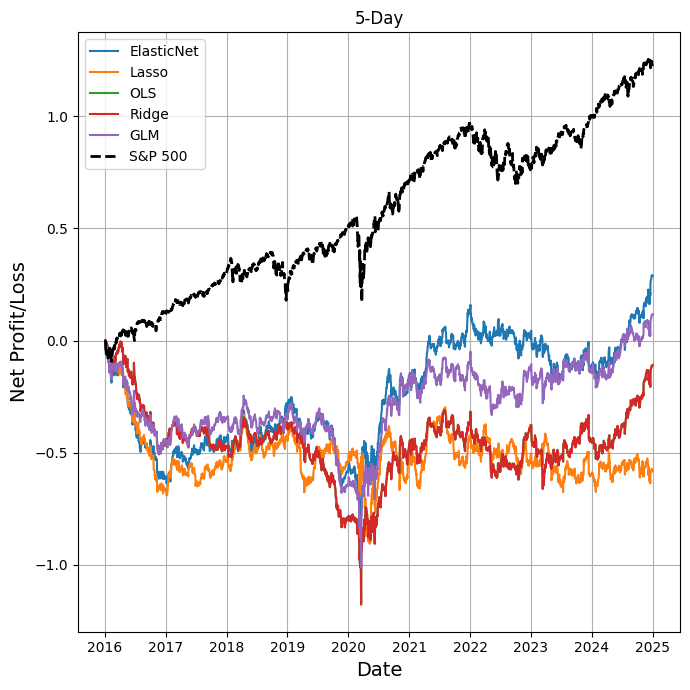

In [10]:
# Plotting returns of linear models vs S&P 500

plt.figure(figsize=(7,7))

# Portfolios
for col in ['ElasticNet', 'Lasso', 'OLS', 'Ridge', 'GLM']:
    plt.plot(portfolio_df.index, portfolio_df[col].cumsum(), label=col, linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("5-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

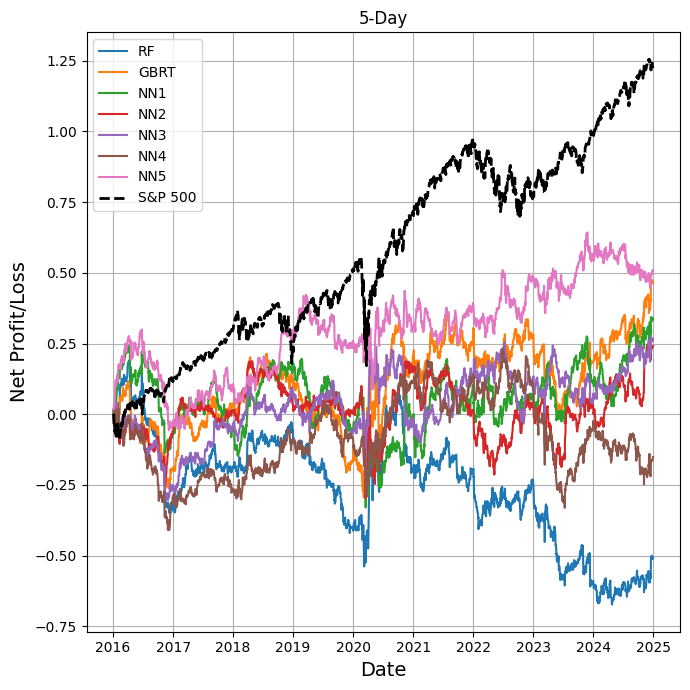

In [32]:
# Plotting returns of non-linear models vs S&P 500

plt.figure(figsize=(7,7))

# Portfolios
for col in ['RF', 'GBRT', 'NN1', 'NN2', 'NN3', 'NN4', 'NN5']:
    plt.plot(portfolio_df.index, portfolio_df[col].cumsum(), label=col, linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("5-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

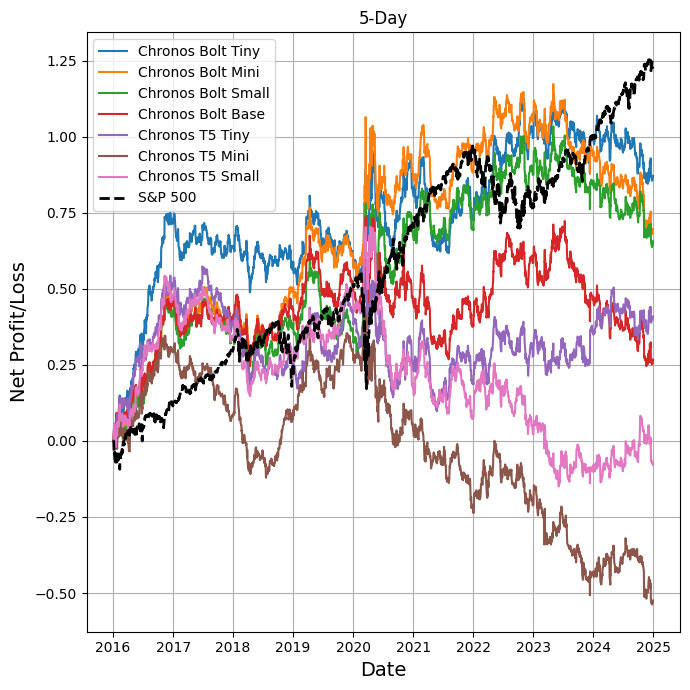

In [33]:
# Plotting returns of chronos models vs S&P 500

plt.figure(figsize=(7,7))
chronos_label = {'y_chr_bolt_tiny': 'Chronos Bolt Tiny', 
         'y_chr_bolt_mini': 'Chronos Bolt Mini', 
         'y_chr_bolt_small': 'Chronos Bolt Small', 
         'y_chr_bolt_base': 'Chronos Bolt Base',
         'y_chr_t5_tiny':'Chronos T5 Tiny', 
         'y_chr_t5_mini':'Chronos T5 Mini', 
         'y_chr_t5_small':'Chronos T5 Small'
         }

# Portfolios
for col in ['y_chr_bolt_tiny', 'y_chr_bolt_mini', 'y_chr_bolt_small', 'y_chr_bolt_base',
            'y_chr_t5_tiny', 'y_chr_t5_mini', 'y_chr_t5_small']:
    plt.plot(portfolio_df.index, portfolio_df[col].cumsum(), label=chronos_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("5-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()


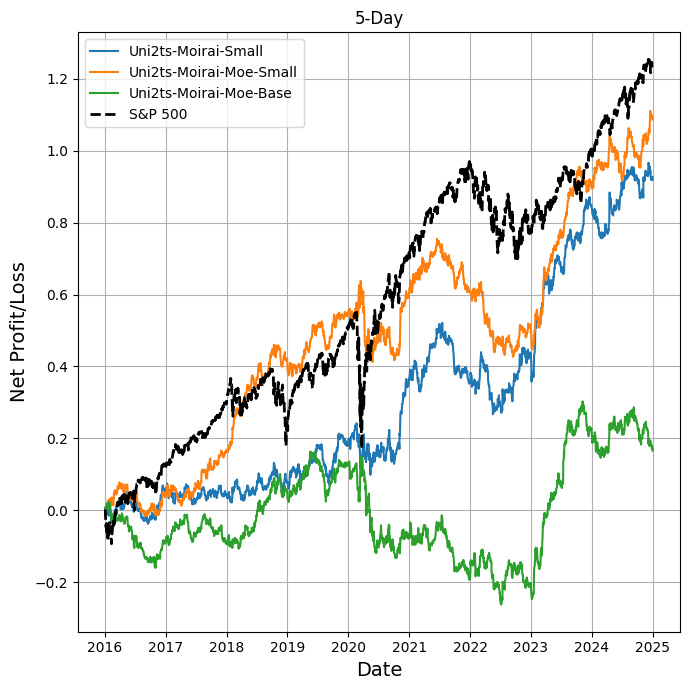

In [34]:
# Plotting returns of uni2ts models vs S&P 500

plt.figure(figsize=(7,7))
uni2ts_label = {"y_moirai_s": "Uni2ts-Moirai-Small",
               "y_moirai_moe_s": "Uni2ts-Moirai-Moe-Small",
               "y_moirai_moe_b": "Uni2ts-Moirai-Moe-Base"
         }

# Portfolios
for col in ['y_moirai_s', 'y_moirai_moe_s', 'y_moirai_moe_b',]:
    plt.plot(portfolio_df.index, portfolio_df[col].cumsum(), label=uni2ts_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("5-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()


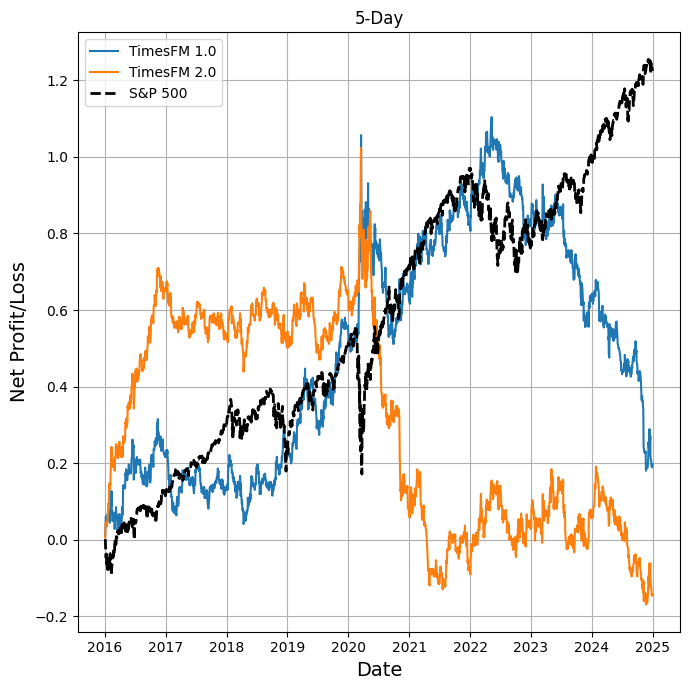

In [35]:
# Plotting returns of TimesFM models vs S&P 500

plt.figure(figsize=(7,7))

timesfm_label = {"y_tfm1": "TimesFM 1.0",
               "y_tfm2": "TimesFM 2.0"
               }

# Portfolios
for col in ['y_tfm1', 'y_tfm2']:
    plt.plot(portfolio_df.index, portfolio_df[col].cumsum(), label=timesfm_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("5-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

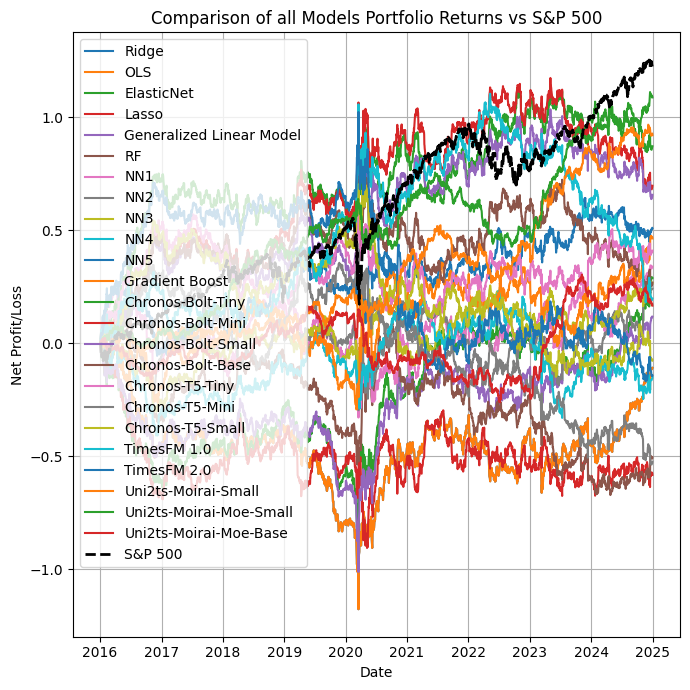

In [15]:
# Plotting returns of all models vs S&P 500

plt.figure(figsize=(7,7))

models_dict = {"OLS": "OLS",
               "Lasso": "Lasso",
               "Ridge": "Ridge",
               "ElasticNet": "ElasticNet",
               "RF": "RF",
               "GLM": "Generalized Linear Model",
               "GBRT": "Gradient Boost",
               "NN1": "NN1",
               "NN2": "NN2",
               "NN3": "NN3",
               "NN4": "NN4",
               "NN5": "NN5",
               "y_chr_bolt_tiny": "Chronos-Bolt-Tiny",
               "y_chr_bolt_mini": "Chronos-Bolt-Mini",
               "y_chr_bolt_small": "Chronos-Bolt-Small",
               "y_chr_bolt_base": "Chronos-Bolt-Base",
               "y_chr_t5_tiny": "Chronos-T5-Tiny",
               "y_chr_t5_mini": "Chronos-T5-Mini",
               "y_chr_t5_small": "Chronos-T5-Small",
               "y_tfm1": "TimesFM 1.0",
               "y_tfm2": "TimesFM 2.0",
               "y_moirai_s": "Uni2ts-Moirai-Small",
               "y_moirai_moe_s": "Uni2ts-Moirai-Moe-Small",
               "y_moirai_moe_b": "Uni2ts-Moirai-Moe-Base"
               }

# Portfolios
for col in model_cols:
    plt.plot(portfolio_df.index, portfolio_df[col].cumsum(), label=models_dict[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("Comparison of all Models Portfolio Returns vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Net Profit/Loss")
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
def sharpe_ratio(df, column_name):
    returns = df[column_name]
    cumulative = (1 + returns).cumprod()
    mean_return = returns.mean()
    vol = returns.std()
    sharpe = mean_return / vol * np.sqrt(252)  # Daily Returns, annualized Sharpe Ratio
    return cumulative, sharpe

# Calculate Sharpe ratios for all models
sharpe_ratios = {}
for model in model_cols:
    cumulative, sharpe = sharpe_ratio(portfolio_df, model)
    sharpe_ratios[model] = sharpe

sharpe_ratios_df = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=['Sharpe Ratio'])

sharpe_ratios_df

,Sharpe Ratio
Ridge,-0.049754
OLS,-0.049754
ElasticNet,0.128019
Lasso,-0.262470
GLM,0.051515
RF,-0.258231
NN1,0.166431
NN2,0.129156
NN3,0.142147
NN4,-0.081728


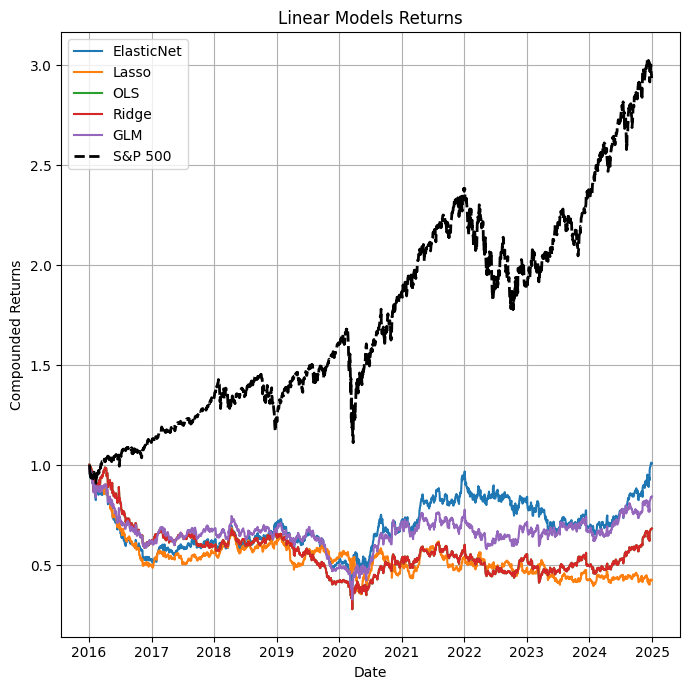

In [17]:
# Plotting compounded returns of linear models vs S&P 500

plt.figure(figsize=(7,7))

# Portfolios
for col in ['ElasticNet', 'Lasso', 'OLS', 'Ridge', 'GLM']:
    plt.plot(portfolio_df.index, (1+portfolio_df[col]).cumprod(), label=col, linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Compounded Returns'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("Linear Models Returns")
plt.xlabel("Date")
plt.ylabel("Compounded Returns")
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

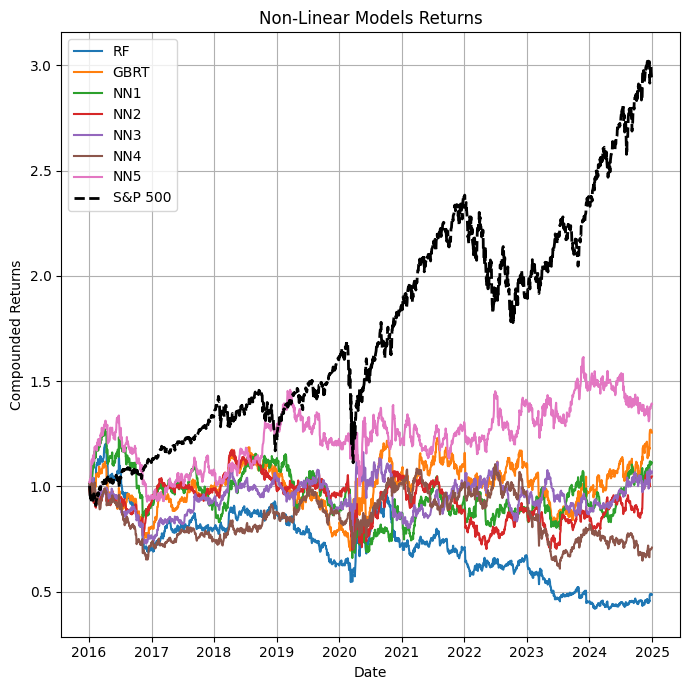

In [18]:
# Plotting returns of non-linear models vs S&P 500

plt.figure(figsize=(7,7))

# Portfolios
for col in ['RF', 'GBRT', 'NN1', 'NN2', 'NN3', 'NN4', 'NN5']:
    plt.plot(portfolio_df.index, (1+portfolio_df[col]).cumprod(), label=col, linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Compounded Returns'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("Non-Linear Models Returns")
plt.xlabel("Date")
plt.ylabel("Compounded Returns")
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

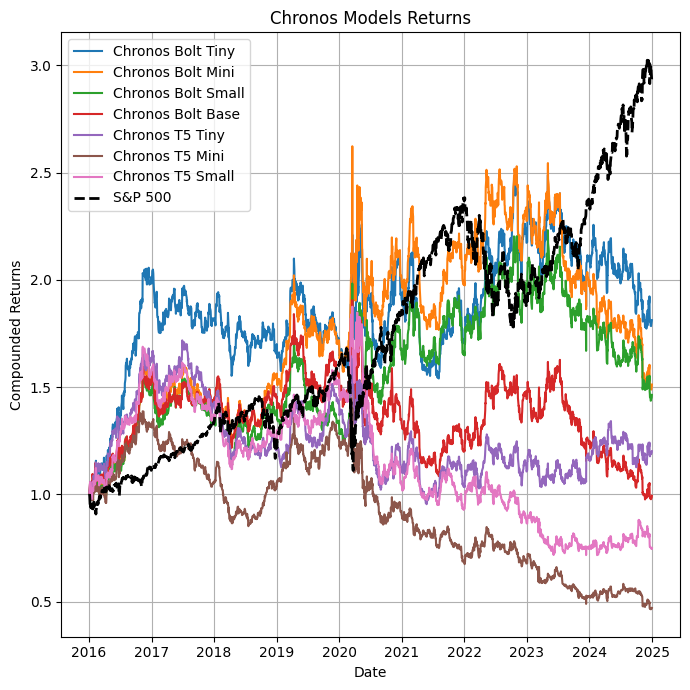

In [19]:
# Plotting returns of chronos models vs S&P 500

plt.figure(figsize=(7,7))
chronos_label = {'y_chr_bolt_tiny': 'Chronos Bolt Tiny', 
         'y_chr_bolt_mini': 'Chronos Bolt Mini', 
         'y_chr_bolt_small': 'Chronos Bolt Small', 
         'y_chr_bolt_base': 'Chronos Bolt Base',
         'y_chr_t5_tiny':'Chronos T5 Tiny', 
         'y_chr_t5_mini':'Chronos T5 Mini', 
         'y_chr_t5_small':'Chronos T5 Small'
         }

# Portfolios
for col in ['y_chr_bolt_tiny', 'y_chr_bolt_mini', 'y_chr_bolt_small', 'y_chr_bolt_base',
            'y_chr_t5_tiny', 'y_chr_t5_mini', 'y_chr_t5_small']:
    plt.plot(portfolio_df.index, (1+portfolio_df[col]).cumprod(), label=chronos_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Compounded Returns'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("Chronos Models Returns")
plt.xlabel("Date")
plt.ylabel("Compounded Returns")
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()


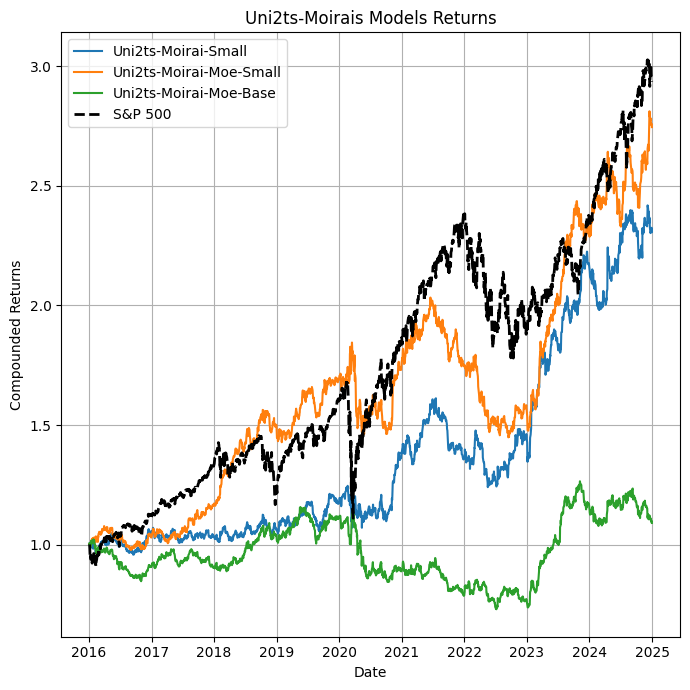

In [20]:
# Plotting returns of uni2ts models vs S&P 500

plt.figure(figsize=(7,7))
uni2ts_label = {"y_moirai_s": "Uni2ts-Moirai-Small",
               "y_moirai_moe_s": "Uni2ts-Moirai-Moe-Small",
               "y_moirai_moe_b": "Uni2ts-Moirai-Moe-Base"
         }

# Portfolios
for col in ['y_moirai_s', 'y_moirai_moe_s', 'y_moirai_moe_b',]:
    plt.plot(portfolio_df.index, (1+portfolio_df[col]).cumprod(), label=uni2ts_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Compounded Returns'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("Uni2ts-Moirais Models Returns")
plt.xlabel("Date")
plt.ylabel("Compounded Returns")
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()


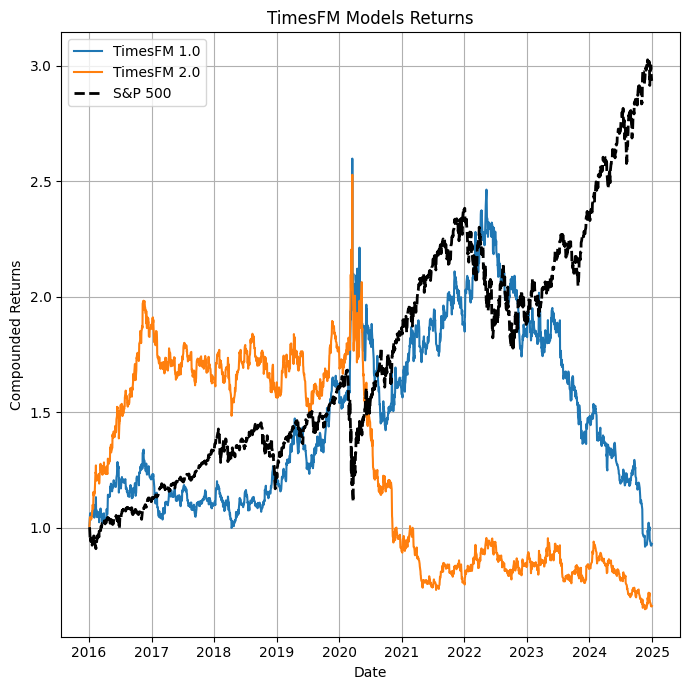

In [21]:
# Plotting returns of TimesFM models vs S&P 500

plt.figure(figsize=(7,7))

timesfm_label = {"y_tfm1": "TimesFM 1.0",
               "y_tfm2": "TimesFM 2.0"
               }

# Portfolios
for col in ['y_tfm1', 'y_tfm2']:
    plt.plot(portfolio_df.index, (1+portfolio_df[col]).cumprod(), label=timesfm_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Compounded Returns'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("TimesFM Models Returns")
plt.xlabel("Date")
plt.ylabel("Compounded Returns")
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

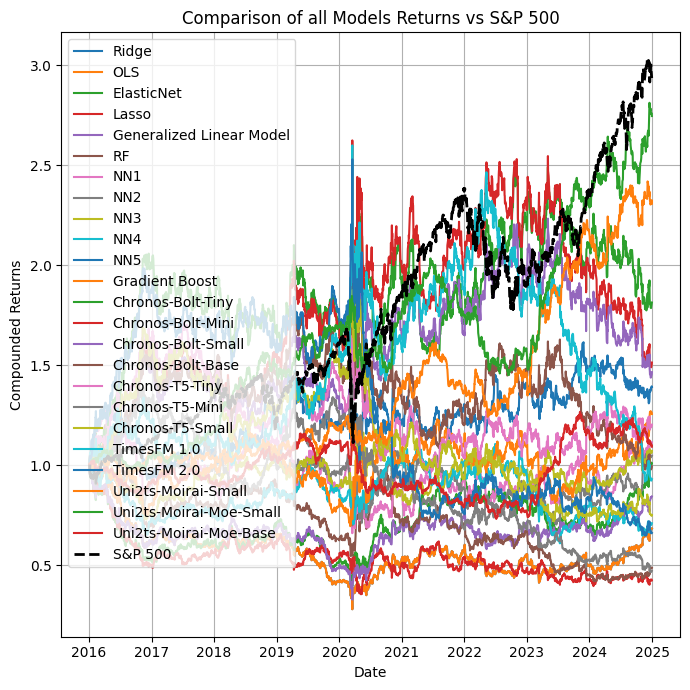

In [22]:
# Plotting returns of all models vs S&P 500

plt.figure(figsize=(7,7))

models_dict = {"OLS": "OLS",
               "Lasso": "Lasso",
               "Ridge": "Ridge",
               "ElasticNet": "ElasticNet",
               "RF": "RF",
               "GLM": "Generalized Linear Model",
               "GBRT": "Gradient Boost",
               "NN1": "NN1",
               "NN2": "NN2",
               "NN3": "NN3",
               "NN4": "NN4",
               "NN5": "NN5",
               "y_chr_bolt_tiny": "Chronos-Bolt-Tiny",
               "y_chr_bolt_mini": "Chronos-Bolt-Mini",
               "y_chr_bolt_small": "Chronos-Bolt-Small",
               "y_chr_bolt_base": "Chronos-Bolt-Base",
               "y_chr_t5_tiny": "Chronos-T5-Tiny",
               "y_chr_t5_mini": "Chronos-T5-Mini",
               "y_chr_t5_small": "Chronos-T5-Small",
               "y_tfm1": "TimesFM 1.0",
               "y_tfm2": "TimesFM 2.0",
               "y_moirai_s": "Uni2ts-Moirai-Small",
               "y_moirai_moe_s": "Uni2ts-Moirai-Moe-Small",
               "y_moirai_moe_b": "Uni2ts-Moirai-Moe-Base"
               }

# Portfolios
for col in model_cols:
    plt.plot(portfolio_df.index, (1+portfolio_df[col]).cumprod(), label=models_dict[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Compounded Returns'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("Comparison of all Models Returns vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Compounded Returns")
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Function to calculate performance metrics

def performance_metrics(df, column_name):
    returns = df[column_name]

    avg_daily_return = returns.mean()
    ann_return = avg_daily_return * 252
    daily_vol = returns.std()
    ann_vol = daily_vol * np.sqrt(252)
    sharpe = avg_daily_return / daily_vol * np.sqrt(252)

    return {
        'Avg Daily Return': avg_daily_return,
        'Annualized Return': ann_return,
        'Daily Volatility': daily_vol,
        'Annualized Volatility': ann_vol,
        'Sharpe Ratio': sharpe    
        }


In [24]:
metrics_dict = {}

for model in model_cols:
    metrics = performance_metrics(portfolio_df, model)
    metrics_dict[model] = {k: v for k, v in metrics.items()}

# Create summary DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index')

metrics_df

,Avg Daily Return,Annualized Return,Daily Volatility,Annualized Volatility,Sharpe Ratio
Ridge,-0.000049,-0.012313,0.015590,0.247477,-0.049754
OLS,-0.000049,-0.012313,0.015590,0.247477,-0.049754
ElasticNet,0.000128,0.032215,0.015852,0.251646,0.128019
Lasso,-0.000259,-0.065362,0.015687,0.249028,-0.262470
GLM,0.000052,0.013129,0.016054,0.254855,0.051515
RF,-0.000225,-0.056664,0.013823,0.219430,-0.258231
NN1,0.000151,0.037936,0.014359,0.227939,0.166431
NN2,0.000107,0.027067,0.013201,0.209564,0.129156
NN3,0.000119,0.029999,0.013294,0.211043,0.142147
NN4,-0.000067,-0.016975,0.013084,0.207706,-0.081728


In [ ]:
def calculate_daily_weights(df, model_col, n=10):
    weights_dict = {}
    for date, group in df.groupby('Date'):
        sorted_group = group.sort_values(model_col, ascending=False)
        no_of_stocks = round((n / 100) * len(sorted_group))
        weights = pd.Series(0, index=sorted_group['PERMNO'])
        weights.loc[sorted_group.head(no_of_stocks)['PERMNO']] = 1 / no_of_stocks
        weights.loc[sorted_group.tail(no_of_stocks)['PERMNO']] = -1 / no_of_stocks
        weights_dict[date] = weights
    weights_df = pd.DataFrame(weights_dict).T.fillna(0)
    return weights_df

def calculate_daily_turnover(weights_df):
    turnover_list = []
    prev_weights = None
    for date, weights in weights_df.iterrows():
        if prev_weights is None:
            turnover = 0
        else:
            turnover = ((weights - prev_weights).abs().sum()) / 2
        turnover_list.append((date, turnover))
        prev_weights = weights
    turnover_df = pd.DataFrame(turnover_list, columns=['Date', 'Turnover']).set_index('Date')
    return turnover_df

def adjust_returns_with_costs(returns_df, turnover_df, transaction_cost_per_trade=0.0015):
    df = returns_df.copy()
    df = df.join(turnover_df, how='left')
    df['Transaction_Cost'] = transaction_cost_per_trade * df['Turnover']
    df['Returns_Adj'] = df['Returns'] - df['Transaction_Cost']
    return df

def performance_metrics(df, return_col='Returns_Adj'):
    returns = df[return_col].dropna()
    avg_daily_return = returns.mean()
    annualized_return = avg_daily_return * 252
    daily_volatility = returns.std()
    annualized_volatility = daily_volatility * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility != 0 else np.nan
    metrics = {
        'Avg Daily Return': avg_daily_return,
        'Annualized Return': annualized_return,
        'Daily Volatility': daily_volatility,
        'Annualized Volatility': annualized_volatility,
        'Sharpe Ratio': sharpe_ratio
    }
    return metrics

# Your list of model columns
model_cols = ['Ridge', 'OLS', 'ElasticNet', 'Lasso', 'GLM', 'RF', 'NN1', 'NN2', 'NN3', 'NN4', 'NN5', 'GBRT', 
              'y_chr_bolt_tiny', 'y_chr_bolt_mini', 'y_chr_bolt_small', 'y_chr_bolt_base',
              'y_chr_t5_tiny', 'y_chr_t5_mini', 'y_chr_t5_small',
              'y_tfm1', 'y_tfm2',
              'y_moirai_s', 'y_moirai_moe_s', 'y_moirai_moe_b']

transaction_cost_per_trade = 0.0002 # 2 bps
n = 10  # top/bottom 10% stocks for long-short

all_metrics = {}
returns_adj_dfs = pd.DataFrame()

for model in model_cols:
    print(f"Processing model: {model}")
    returns_df = build_long_short_portfolio(combined_df, model, n=n)
    returns_df.set_index('Date', inplace=True)
    weights_df = calculate_daily_weights(combined_df, model, n=n)
    turnover_df = calculate_daily_turnover(weights_df)
    returns_adj_df = adjust_returns_with_costs(returns_df, turnover_df, transaction_cost_per_trade)
    metrics = performance_metrics(returns_adj_df, return_col='Returns_Adj')
    all_metrics[model] = metrics
    returns_adj_dfs[model] = returns_adj_df['Returns_Adj']


# Convert dict of dicts to DataFrame for easier viewing
metrics_df_adj = pd.DataFrame.from_dict(all_metrics, orient='index')
metrics_df_adj = metrics_df_adj.sort_values(by='Sharpe Ratio', ascending=False)

print(metrics_df_adj)


In [51]:
metrics_df_adj

,Avg Daily Return,Annualized Return,Daily Volatility,Annualized Volatility,Sharpe Ratio
y_moirai_moe_s,0.000130,0.032735,0.008306,0.131856,0.248264
y_moirai_s,0.000054,0.013494,0.008665,0.137549,0.098100
y_chr_bolt_tiny,0.000054,0.013725,0.015643,0.248326,0.055270
y_chr_bolt_mini,-0.000009,-0.002228,0.015822,0.251168,-0.008870
y_chr_bolt_small,-0.000023,-0.005807,0.015612,0.247826,-0.023430
NN1,-0.000046,-0.011634,0.014359,0.227935,-0.051042
NN5,-0.000057,-0.014441,0.012609,0.200160,-0.072147
GBRT,-0.000093,-0.023454,0.014480,0.229864,-0.102034
y_tfm1,-0.000165,-0.041578,0.015506,0.246148,-0.168917
y_chr_t5_tiny,-0.000158,-0.039819,0.014170,0.224936,-0.177024


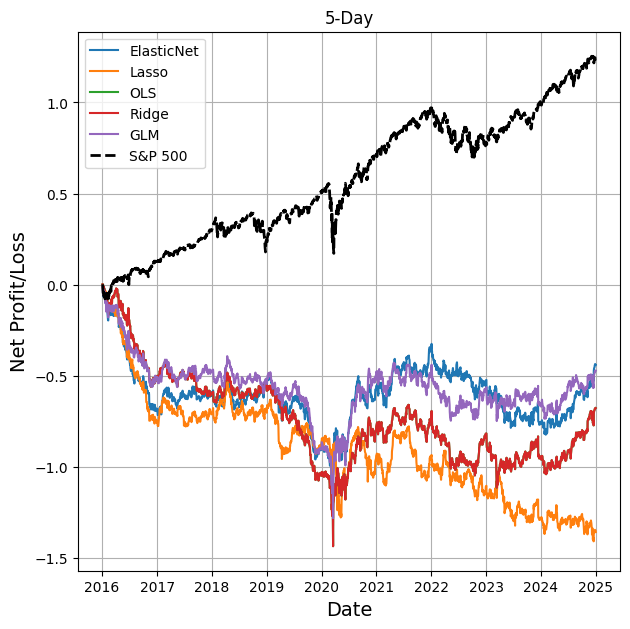

In [53]:
# Plotting returns of linear models vs S&P 500

plt.figure(figsize=(7,7))

# Portfolios
for col in ['ElasticNet', 'Lasso', 'OLS', 'Ridge', 'GLM']:
    plt.plot(returns_adj_dfs.index, returns_adj_dfs[col].cumsum(), label=col, linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("5-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
#plt.tight_layout()
plt.show()

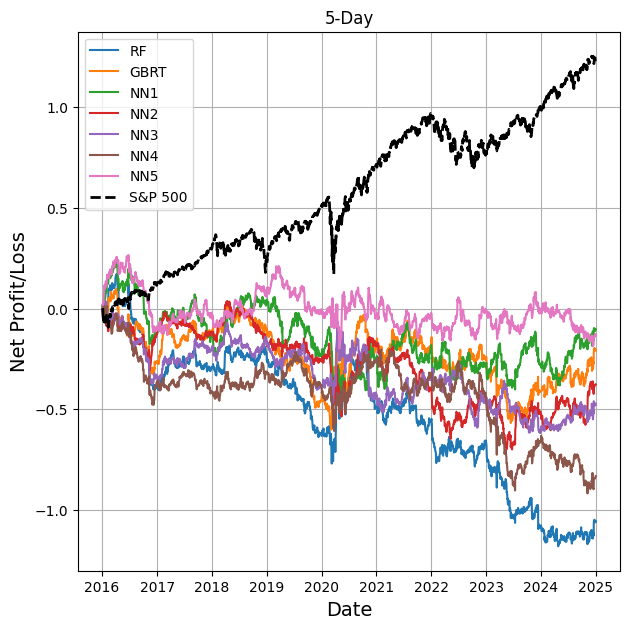

In [54]:
# Plotting returns of non-linear models vs S&P 500

plt.figure(figsize=(7,7))

# Portfolios
for col in ['RF', 'GBRT', 'NN1', 'NN2', 'NN3', 'NN4', 'NN5']:
    plt.plot(returns_adj_dfs.index, returns_adj_dfs[col].cumsum(), label=col, linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("5-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
#plt.tight_layout()
plt.show()

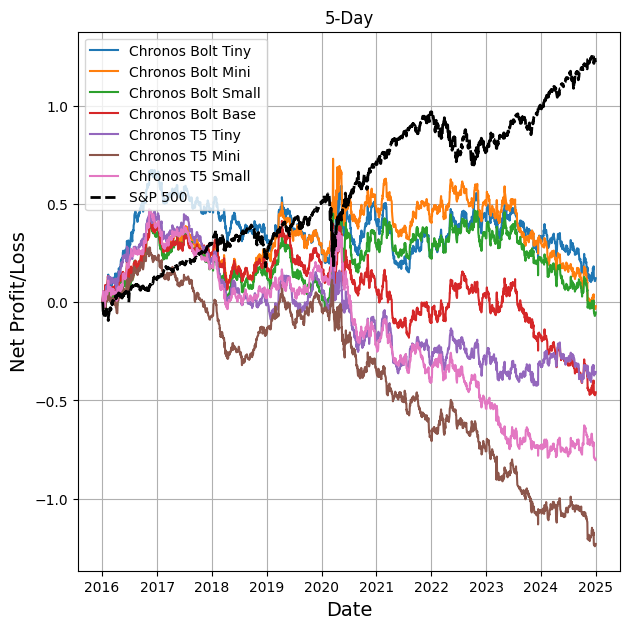

In [55]:
# Plotting returns of chronos models vs S&P 500

plt.figure(figsize=(7,7))
chronos_label = {'y_chr_bolt_tiny': 'Chronos Bolt Tiny', 
         'y_chr_bolt_mini': 'Chronos Bolt Mini', 
         'y_chr_bolt_small': 'Chronos Bolt Small', 
         'y_chr_bolt_base': 'Chronos Bolt Base',
         'y_chr_t5_tiny':'Chronos T5 Tiny', 
         'y_chr_t5_mini':'Chronos T5 Mini', 
         'y_chr_t5_small':'Chronos T5 Small'
         }

# Portfolios
for col in ['y_chr_bolt_tiny', 'y_chr_bolt_mini', 'y_chr_bolt_small', 'y_chr_bolt_base',
            'y_chr_t5_tiny', 'y_chr_t5_mini', 'y_chr_t5_small']:
    plt.plot(returns_adj_dfs.index, returns_adj_dfs[col].cumsum(), label=chronos_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("5-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
#plt.tight_layout()
plt.show()

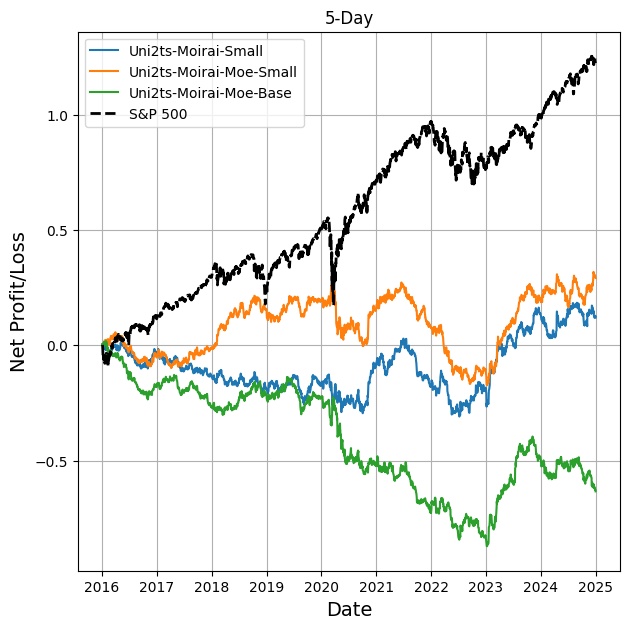

In [56]:
# Plotting returns of uni2ts models vs S&P 500

plt.figure(figsize=(7,7))
uni2ts_label = {"y_moirai_s": "Uni2ts-Moirai-Small",
               "y_moirai_moe_s": "Uni2ts-Moirai-Moe-Small",
               "y_moirai_moe_b": "Uni2ts-Moirai-Moe-Base"
         }

# Portfolios
for col in ['y_moirai_s', 'y_moirai_moe_s', 'y_moirai_moe_b',]:
    plt.plot(returns_adj_dfs.index, returns_adj_dfs[col].cumsum(), label=uni2ts_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("Uni2ts-Moirais Models Portfolio Returns")
plt.title("5-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
#plt.tight_layout()
plt.show()


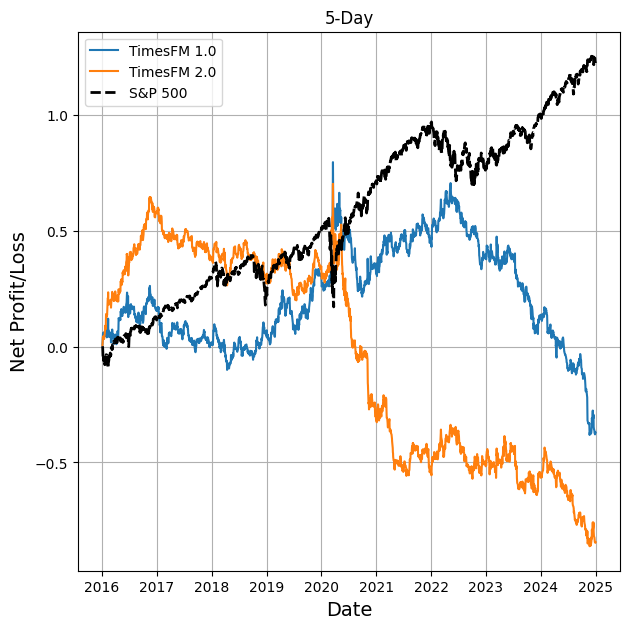

In [57]:
# Plotting returns of uni2ts models vs S&P 500

plt.figure(figsize=(7,7))
timesfm_label = {"y_tfm1": "TimesFM 1.0",
               "y_tfm2": "TimesFM 2.0"
               }

# Portfolios
for col in ['y_tfm1', 'y_tfm2']:
    plt.plot(returns_adj_dfs.index, returns_adj_dfs[col].cumsum(), label=timesfm_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("Uni2ts-Moirais Models Portfolio Returns")
plt.title("5-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
#plt.tight_layout()
plt.show()